In [3]:
from matplotlib import pyplot as plt

In [4]:
import numpy as np

In [5]:
pkid = 0.4
padult = 0.6

px_kid = np.full((10),0.1)
px_adult = np.hstack([np.full((5),0.02), np.full((5),0.18)])

height = np.array([4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8])


In [29]:
def village(pkid,px_kid,px_adult,height):
    choice = np.random.choice([0,1],1,p=[pkid,1-pkid])
    
    if(choice == 0):
        height_chosen = np.random.choice(height,1,p=px_kid)
    else:
        height_chosen = np.random.choice(height,1,p=px_adult)
    
    return np.hstack([choice,height_chosen])
    

In [30]:
ans = village(pkid,px_kid,px_adult,height)

for t in range(999):  
    ans = np.vstack([ans,village(pkid,px_kid,px_adult,height)])
    

In [8]:
ind_k = np.where(0 == ans[:,0])[0]

In [9]:
ind = np.where(1 == ans[:,0])[0]     

In [10]:
kids = ans[ind_k]

In [11]:
adults = ans[ind]

(array([  6.,   8.,  10.,  12.,  12.,  95., 100.,  97., 132., 110.]),
 array([4.9 , 4.99, 5.08, 5.17, 5.26, 5.35, 5.44, 5.53, 5.62, 5.71, 5.8 ]),
 <a list of 10 Patch objects>)

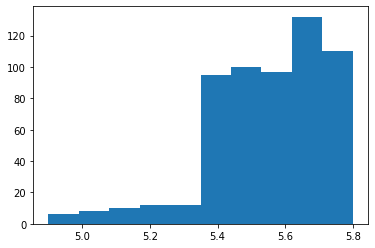

In [12]:
plt.hist(adults[:,1])

(array([42., 45., 34., 40., 44., 41., 36., 43., 48., 45.]),
 array([4.9 , 4.99, 5.08, 5.17, 5.26, 5.35, 5.44, 5.53, 5.62, 5.71, 5.8 ]),
 <a list of 10 Patch objects>)

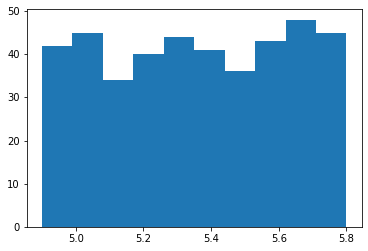

In [13]:
plt.hist(kids[:,1])

(array([ 48.,  53.,  44.,  52.,  56., 136., 136., 140., 180., 155.]),
 array([4.9 , 4.99, 5.08, 5.17, 5.26, 5.35, 5.44, 5.53, 5.62, 5.71, 5.8 ]),
 <a list of 10 Patch objects>)

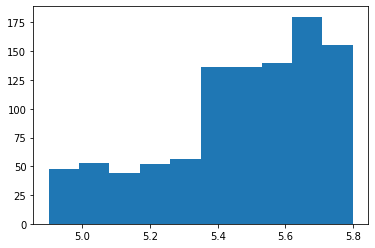

In [14]:
plt.hist(ans[:,1])

In [26]:
def agent_action(pkid,px_adult,px_kid,obs):
    target = obs[0]
    height_obs = obs[1]

    pkid_x = px_kid * pkid 
    padult_x = px_adult * (1-pkid)
    
    ind = np.where(height_obs == height)[0]
    
#     print(ind)
    
    px = pkid_x[ind]
    pa = padult_x[ind]
    
    if(px >= pa):
        return 0
    else:
        return 1
    

In [31]:
loss = 0

for x in ans:
    action = agent_action(pkid,px_adult,px_kid,x)
#     print(action)
#     print(action,int(x[0]))
    if(action != int(x[0])):
        loss += 1
    

In [32]:
loss

258

array([0. , 5.1])

(array([418.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 582.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

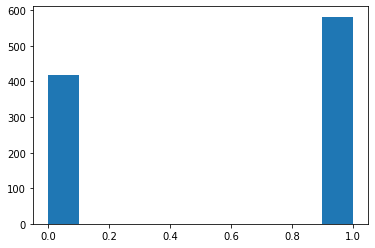

In [22]:
plt.hist(ans[:,0])

(array([ 48.,  53.,  44.,  52.,  56., 136., 136., 140., 180., 155.]),
 array([4.9 , 4.99, 5.08, 5.17, 5.26, 5.35, 5.44, 5.53, 5.62, 5.71, 5.8 ]),
 <a list of 10 Patch objects>)

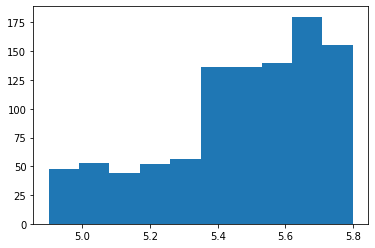

In [19]:
plt.hist(ans[:,1])